In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../data/employee_data.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [5]:
engagement_cols = [
    "JobInvolvement",
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction"
]

scaler = MinMaxScaler()
df[engagement_cols] = scaler.fit_transform(df[engagement_cols])

df["EngagementIndex"] = df[engagement_cols].mean(axis=1)

df["EngagementIndex"].head()

0    0.500000
1    0.583333
2    0.583333
3    0.750000
4    0.500000
Name: EngagementIndex, dtype: float64

In [7]:
def burnout(row):
    if row["OverTime"] == "Yes" and row["WorkLifeBalance"] <= 2:
        return "High"
    elif row["OverTime"] == "Yes":
        return "Medium"
    else:
        return "Low"

df["BurnoutRisk"] = df.apply(burnout, axis=1)

df["BurnoutRisk"].value_counts()


BurnoutRisk
Low       1054
Medium     290
High       126
Name: count, dtype: int64

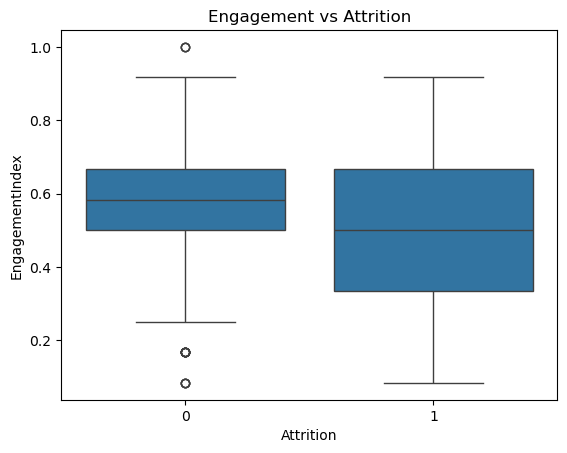

In [9]:
sns.boxplot(x="Attrition", y="EngagementIndex", data=df)
plt.title("Engagement vs Attrition")
plt.show()

In [ ]:
Employees who left show lower engagement compared to those who stayed.

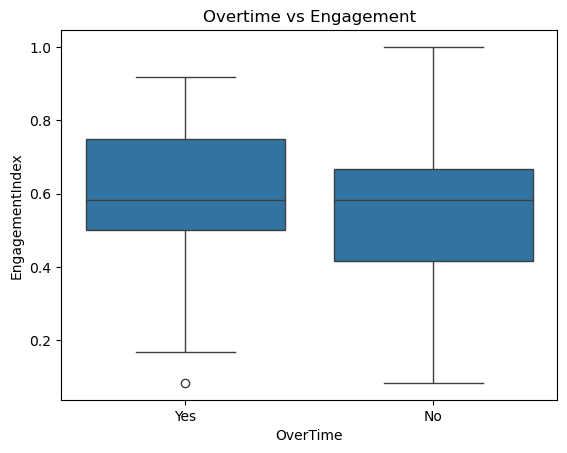

In [11]:
sns.boxplot(x="OverTime", y="EngagementIndex", data=df)
plt.title("Overtime vs Engagement")
plt.show()

In [ ]:
Employees who left show lower engagement compared to those who stayed.

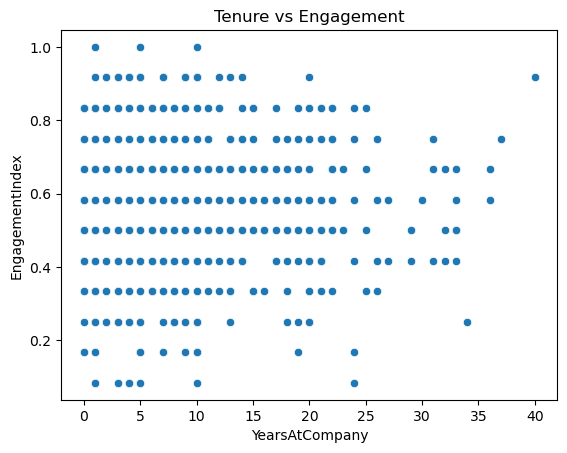

In [13]:
sns.scatterplot(x="YearsAtCompany", y="EngagementIndex", data=df)
plt.title("Tenure vs Engagement")
plt.show()

In [ ]:
Employees who left show lower engagement compared to those who stayed.

In [17]:
df["WorkLifeBalanceIndex"] = df["WorkLifeBalance"]

df["WorkLifeBalanceIndex"].mean()

2.7612244897959184

In [ ]:
Work-Life Balance Index was calculated as the average of employee-reported balance ratings.

In [19]:
df["SatisfactionStability"] = df[
    ["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction"]
].std(axis=1)

df["SatisfactionStability"].describe()

count    1470.000000
mean        0.328136
std         0.159295
min         0.000000
25%         0.192450
50%         0.333333
75%         0.509175
max         0.577350
Name: SatisfactionStability, dtype: float64

In [ ]:
Satisfaction Stability Score measures variation across satisfaction dimensions to detect inconsistent employee experience.

In [21]:
df["WorkloadStress"] = (
    (df["OverTime"] == "Yes").astype(int) +
    df["BusinessTravel"].map({
        "Non-Travel": 0,
        "Travel Rarely": 1,
        "Travel Frequently": 2
    })
)

df["WorkloadStress"].describe()

count    150.000000
mean       0.233333
std        0.424370
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: WorkloadStress, dtype: float64

In [ ]:
Workload Stress Indicator combines overtime status and travel frequency to assess stress exposure.